## Heap sort


Sorted inplace
- Worst Case:    O(n log n)  
- Best Case:     O(n log n)  
- Average Case:  O(n log n)  

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import seaborn as sns; sns.set()

In [144]:
# n is size of heap 
def heapify(arr, N, idx):
    largest = idx # Initialize largest as root 
    left = 2 * idx + 1     # left = 2*i + 1 
    right = left + 1     # right = 2*i + 2 
    
    #compare wirh a child
    if left < N and arr[idx] < arr[left]: 
        largest = left     
    if right < N and arr[largest] < arr[right]: 
        largest = right
    #swap
    if largest != idx: 
        arr[idx], arr[largest] = arr[largest],arr[idx] # swap 
        heapify(arr, N, largest) 
        
def heap_sort(arr): 
    N = len(arr) 
    # Build a maxheap.
    for i in range(N, -1, -1): 
        heapify(arr, N, i) 
        
    for i in range(N-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0) 
  # Driver code to test above 


# This code is contributed by Mohit Kumra 

### Selection sort

Sorted inplace
- Worst Case: O($n^2$)
- Best Case: O($n^2$)
- Average Case: O($n^2$) 

In [118]:
def selection_sort(A):
    for i in range(len(A)): 
        min_idx = i 
        for j in range(i+1, len(A)): 
            if A[min_idx] > A[j]: 
                min_idx = j         
        A[i], A[min_idx] = A[min_idx], A[i]


#### Сравнение алгоритмов сортировки для массива разной длины

In [140]:
def meusure_time(fun, A, lenghts = [1000]):
    """Функция вычисляющая время работы алгоритма
       для разного размера
       Выводит массив со временем(в секундах)"""
    mas = []
    N = 3 # по какому брать среднее
    
    for i in tqdm(lenghts): # progress bar
        interval = 0
        for j in range(N):
            start_time = time.time()
            fun(A[:i])
            end_time = time.time()
            interval += end_time - start_time
        mas.append((interval)/N)
    return mas

In [141]:
A = np.random.rand(100*k)
B = A.copy()

In [153]:
k = 1000
lenghts = [i for i in range(k,100*k,5*k)] # 1 000 000
mas_1 = meusure_time(heap_sort, A ,lenghts)
#mas_2 = meusure_time(selection_sort, B, lenghts)







  0%|                                                   | 0/20 [00:00<?, ?it/s]



 10%|████▎                                      | 2/20 [00:00<00:04,  3.77it/s]



 15%|██████▍                                    | 3/20 [00:01<00:07,  2.19it/s]



 20%|████████▌                                  | 4/20 [00:02<00:11,  1.35it/s]



 25%|██████████▊                                | 5/20 [00:04<00:15,  1.04s/it]



 30%|████████████▉                              | 6/20 [00:06<00:20,  1.44s/it]



 35%|███████████████                            | 7/20 [00:09<00:23,  1.78s/it]



 40%|█████████████████▏                         | 8/20 [00:12<00:26,  2.17s/it]



 45%|███████████████████▎                       | 9/20 [00:17<00:31,  2.84s/it]



 50%|█████████████████████                     | 10/20 [00:21<00:32,  3.25s/it]



 55%|███████████████████████                   | 11/20 [00:25<00:32,  3.65s/it]



 60%|█████████████████████████▏                | 12/20 [00:30<00:32,  4.10s/it]





In [150]:
sns.set()

[0.02302585 0.17399029 0.34120719 0.51628501 0.69665944 0.88104049
 1.06864672 1.25895291 1.4515814  1.64624749 1.84272875 2.04084663
 2.24045459 2.4414302  2.64366965 2.84708378 3.0515952  3.25713607
 3.46364648 3.67107311]


Text(0.5, 1.0, 'Сравнение selection_sort vs heap_sort для разной длины массива')

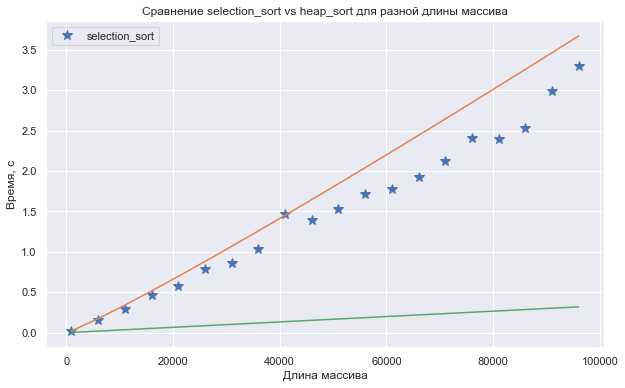

In [167]:
asym = lenghts*np.log(lenghts) /300000
asym_2 = np.array(lenghts) / 300000
print(asym)
plt.figure(figsize = (10,6))
plt.plot(lenghts, mas_1, '*', label='selection_sort', ms=10)
plt.plot(lenghts, asym)
plt.plot(lenghts, asym_2)
#plt.plot(lenghts, mas2, 'o', label ='heap_sort', ms=8)
plt.xlabel('Длина массива'); plt.ylabel('Время, c')
plt.legend()
plt.title('Сравнение selection_sort vs heap_sort для разной длины массива')

In [46]:
def bubble(mas):
    for j in range(0, len(mas)-1): 
        if mas[j] > mas[j+1] :
            mas[j], mas[j+1] = mas[j+1], mas[j]    
    return mas
def create_table(N, jump = 1):
    """Create inverse sorted massive
    and take bubble to normal sorted massive
    Output: (N, N/jump)
    """
    Mas = np.zeros((N,N))
    Mas[:,0] = np.arange(N, 0, -1)
    for i in range(1,N):
        Mas[:,i] = bubble(Mas[:,i-1])
    return Mas[:, ::jump]


In [52]:
Mas_1 = create_table(10000, 5)
Mas_1.shape

(10000, 2000)

In [95]:
arr = np.random.rand(3,1)


array([[0.58634448],
       [0.05943974],
       [0.3654746 ]])

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]